# Recommendation system using cosine similarities

In [ ]:
!pip install pandas sklearn nltk  # Uncomment and run to install the dependencies

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import re

pd.set_option('display.width', None)

df = pd.read_excel("dataset.xls")

In [16]:
df

,SECTION_CD,SECTION_ARBC_DESC,SECTION_ENG_DESC,CHAPTER_ARBC_DESC,CHAPTER_ENG_DESC,DIGIT4_HRMNZD_CD,DIGIT4_HRMNZD_DSC,DIGIT4_HRMNZD_EN_DSC,HRMNZD_CD,ITEM_ARBC_DESC,ITEM_ENG_DESC,DUTY_RATE
0,1,حيوانات حية ومنتجات المملكة الحيوانية,LIVE ANIMALS; ANIMAL PRODUCTS,حيوانـــــــــــــات حيــــــــــــــة,Live animals,101.0,"""خيول وحمير وبغال و كوادن (نغال)، حيه""",NaN,10110000000,ـ أصيلة للأنسال:,- Pure-bred breeding animals,0.0
1,1,حيوانات حية ومنتجات المملكة الحيوانية,LIVE ANIMALS; ANIMAL PRODUCTS,حيوانـــــــــــــات حيــــــــــــــة,Live animals,101.0,"""خيول وحمير وبغال و كوادن (نغال)، حيه""",NaN,10110100000,ـ ـ ـ خيول من أصل عربي,--Of Arab breed,0.0
2,1,حيوانات حية ومنتجات المملكة الحيوانية,LIVE ANIMALS; ANIMAL PRODUCTS,حيوانـــــــــــــات حيــــــــــــــة,Live animals,101.0,"""خيول وحمير وبغال و كوادن (نغال)، حيه""",NaN,10121100001,من اصل عربي ذكور,Of Arab breed males,0.0
3,1,حيوانات حية ومنتجات المملكة الحيوانية,LIVE ANIMALS; ANIMAL PRODUCTS,حيوانـــــــــــــات حيــــــــــــــة,Live animals,101.0,"""خيول وحمير وبغال و كوادن (نغال)، حيه""",NaN,10121100002,من أصل عربي إناث,Of Arab breed females,0.0
4,1,حيوانات حية ومنتجات المملكة الحيوانية,LIVE ANIMALS; ANIMAL PRODUCTS,حيوانـــــــــــــات حيــــــــــــــة,Live animals,101.0,"""خيول وحمير وبغال و كوادن (نغال)، حيه""",NaN,10121900001,من غير أصل عربي ذكور,Of non-Arab breed males,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19681,21,تحف فنية ، قطع للمجموعات وقطع أثرية,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",سلع ذات أحكام خاصة,Commodities special provisions,9802.0,ما يرد للهيئات الدبلوماسية والقنصلية والمنظمات...,NaN,980200100000,ـ ـ ـ ـ للسفارات والقنصليات:,- - - For embassies and consulates:,0.0
19682,21,تحف فنية ، قطع للمجموعات وقطع أثرية,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",سلع ذات أحكام خاصة,Commodities special provisions,9802.0,ما يرد للهيئات الدبلوماسية والقنصلية والمنظمات...,NaN,980200100001,مواد غذائية ومشروبات,Foodstuffs and beverages,0.0
19683,21,تحف فنية ، قطع للمجموعات وقطع أثرية,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",سلع ذات أحكام خاصة,Commodities special provisions,9802.0,ما يرد للهيئات الدبلوماسية والقنصلية والمنظمات...,NaN,980200100002,مركبات,vehicles,0.0
19684,21,تحف فنية ، قطع للمجموعات وقطع أثرية,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",سلع ذات أحكام خاصة,Commodities special provisions,9802.0,ما يرد للهيئات الدبلوماسية والقنصلية والمنظمات...,NaN,980200109999,غيرها مما يرد للسفارات والقنصليات,Other impors for embassies and consulates,0.0


In [17]:
features = ['SECTION_ENG_DESC','CHAPTER_ENG_DESC','ITEM_ENG_DESC']
dfm = df[features]
dfm["HRMNZD_CD"] = df["HRMNZD_CD"]

<ipython-input-17-cc47fcee435d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["HRMNZD_CD"] = df["HRMNZD_CD"]


## Data Cleaning

In [18]:
dfm

,SECTION_ENG_DESC,CHAPTER_ENG_DESC,ITEM_ENG_DESC,HRMNZD_CD
0,LIVE ANIMALS; ANIMAL PRODUCTS,Live animals,- Pure-bred breeding animals,10110000000
1,LIVE ANIMALS; ANIMAL PRODUCTS,Live animals,--Of Arab breed,10110100000
2,LIVE ANIMALS; ANIMAL PRODUCTS,Live animals,Of Arab breed males,10121100001
3,LIVE ANIMALS; ANIMAL PRODUCTS,Live animals,Of Arab breed females,10121100002
4,LIVE ANIMALS; ANIMAL PRODUCTS,Live animals,Of non-Arab breed males,10121900001
...,...,...,...,...
19681,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",Commodities special provisions,- - - For embassies and consulates:,980200100000
19682,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",Commodities special provisions,Foodstuffs and beverages,980200100001
19683,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",Commodities special provisions,vehicles,980200100002
19684,"WORKS OF ART, COLLECTORS' PIECES AND ANTIQUES",Commodities special provisions,Other impors for embassies and consulates,980200109999


In [19]:
dfm.isnull().sum() #check for missing values

SECTION_ENG_DESC      0
CHAPTER_ENG_DESC      0
ITEM_ENG_DESC       852
HRMNZD_CD             0
dtype: int64

In [20]:
# remove missing values
dfm.dropna(inplace=True)

# again check missing values
dfm.isnull().sum()

<ipython-input-20-9f48c799b204>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm.dropna(inplace=True)


SECTION_ENG_DESC    0
CHAPTER_ENG_DESC    0
ITEM_ENG_DESC       0
HRMNZD_CD           0
dtype: int64

In [21]:
# helper functions to clean the data

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def clean(string):
    string = _removeNonAscii(string)
    string = make_lower_case(string)
    string = remove_html(string)
    string = remove_punctuation(string) 
    return string 


for i in dfm[features]:
    dfm[i] = dfm[i].apply(_removeNonAscii)
    dfm[i] = dfm[i].apply(make_lower_case)
    # dfm[i] = dfm[i].apply(func = remove_stop_words)
    dfm[i] = dfm[i].apply(remove_punctuation)
    dfm[i] = dfm[i].apply(remove_html)

<ipython-input-21-6a75fa1edb58>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm[i] = dfm[i].apply(_removeNonAscii)
<ipython-input-21-6a75fa1edb58>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm[i] = dfm[i].apply(make_lower_case)
<ipython-input-21-6a75fa1edb58>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [22]:
dfm["combined_features"] = dfm['SECTION_ENG_DESC']+" "+dfm['CHAPTER_ENG_DESC']+" "+dfm['ITEM_ENG_DESC'] 
dfm['index'] = dfm.index

<ipython-input-22-d894424b1d2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["combined_features"] = dfm['SECTION_ENG_DESC']+" "+dfm['CHAPTER_ENG_DESC']+" "+dfm['ITEM_ENG_DESC']
<ipython-input-22-d894424b1d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['index'] = dfm.index


In [23]:
dfm.iloc[0].combined_features

'live animals animal products live animals pure bred breeding animals'

In [24]:
dfm.sample(10)

,SECTION_ENG_DESC,CHAPTER_ENG_DESC,ITEM_ENG_DESC,HRMNZD_CD,combined_features,index
15645,base metals and articles of base metal,aluminium and articles thereof,aluminum scrap of plates sheets foils and stri...,760200000004,base metals and articles of base metal alumini...,15645
6651,products of the chemical or allied industries,organic chemicals,n n diethyl aminoethyl 2 chloride,292119520000,products of the chemical or allied industries ...,6651
3548,animal or vegetable fats and oils and their cl...,animal or vegetable fats and oils and their cl...,chemically modified vegetable oil mixed with b...,151800200010,animal or vegetable fats and oils and their cl...,3548
5822,products of the chemical or allied industries,inorganic chemicals organic or inorganic compo...,copper sulfide,283090000010,products of the chemical or allied industries ...,5822
17238,machinery and mechanical appliances electrical...,nuclear reactors boilers machinery and mechani...,microscopes fitted with instruments of a kind ...,848640910000,machinery and mechanical appliances electrical...,17238
6608,products of the chemical or allied industries,organic chemicals,ketone acids,291830000002,products of the chemical or allied industries ...,6608
13830,articles of stone plaster cement asbestos mica...,articles of stone plaster cement asbestos mica...,stones made of smooth marble and flat surfaces,680221000011,articles of stone plaster cement asbestos mica...,13830
3290,animal or vegetable fats and oils and their cl...,animal or vegetable fats and oils and their cl...,partials of refined oil of brazilian palm frui...,151329000005,animal or vegetable fats and oils and their cl...,3290
3084,animal or vegetable fats and oils and their cl...,animal or vegetable fats and oils and their cl...,grease of buffalo frozen and edible,150290000005,animal or vegetable fats and oils and their cl...,3084
9999,wood and articles of wood wood charcoal cork a...,wood and articles of wood wood charcoal,of eucalyptus eucalyptus spp,440398000000,wood and articles of wood wood charcoal cork a...,9999


## Cosine Similarities

In [25]:
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(dfm["combined_features"]) 
cosine_sim = cosine_similarity(count_matrix)

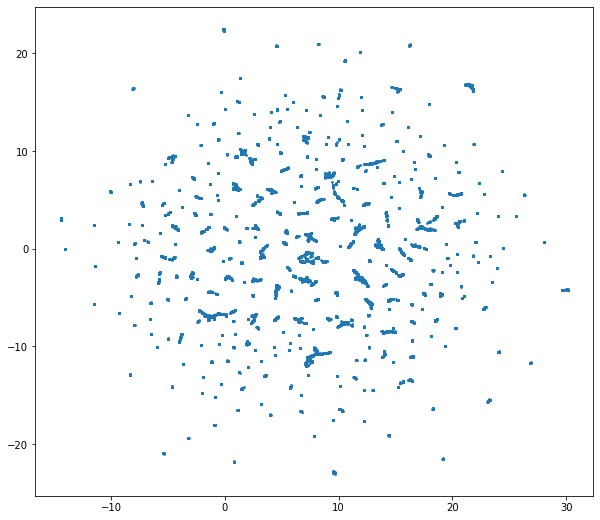

In [26]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(cosine_sim)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

## Predictions

In [27]:
# functions for retrieving items
def get_desc_from_index(index):
    return dfm[dfm.index == index]["combined_features"].values[0]

def get_index_from_desc(desc):
    return dfm[dfm.combined_features.str.contains(desc)]["index"].values[0]

def get_code_from_index(index):
    return dfm[dfm.index == index]["HRMNZD_CD"].values[0]

In [28]:
# main function to retrive the most similar items for a given item
def most_similar(item_chosen, items=5):
    most_similar_items = []
    item_chosen = clean(item_chosen)
    try:
        get_index_from_desc(item_chosen)
    except IndexError:
       print("Item doesnt exist in the database")
    item_index = get_index_from_desc(item_chosen)
    similar_items = list(enumerate(cosine_sim[item_index])) 
    sorted_similar_items = sorted(similar_items,key=lambda x:x[1],reverse=True)[1:]
    i=1
    for element in sorted_similar_items:
        most_similar_items.append((get_desc_from_index(element[0]), get_code_from_index(element[0])))
        i=i+1
        if i>items:
            break
    return most_similar_items

## Examples

In [34]:
most_similar("animal or vegetable fats and oils", 3)

[('vegetable products vegetable plaiting materials vegetable products not elsewhere specified or included ground henna',
  140490200002),
 ('vegetable products vegetable plaiting materials vegetable products not elsewhere specified or included other',
  140490900000),
 ('animal or vegetable fats and oils and their cleavage products prepared edible fats animal or vegetable waxes animal or vegetable fats and oils and their cleavage products prepared edible fats animal or vegetable waxes other pig fat',
  150120000000)]

In [32]:
most_similar("grey copper")

[('mineral products ores slag and ash chalcocite copper sulphide',
  260300000006),
 ('mineral products ores slag and ash chalcocite ores copper pyrite or copper and iron sulphide',
  260300000007),
 ('mineral products ores slag and ash chrysocolla ores german copper phyllosilicate',
  260300000008),
 ('mineral products ores slag and ash dioptase ores copper cyclosilicate',
  260300000011),
 ('mineral products ores slag and ash covellite ores copper sulphide',
  260300000009)]

In [33]:
most_similar("pepsin enzymes", 6)

[('products of the chemical or allied industries soap organic surface active agents washing preparations lubricating preparations artificial waxes prepared waxes polishing or scouring preparations candles and similar articles modelling pastes dental waxes and dental preparations with a basis o toilet substance impregnated paper',
  340119400002),
 ('products of the chemical or allied industries soap organic surface active agents washing preparations lubricating preparations artificial waxes prepared waxes polishing or scouring preparations candles and similar articles modelling pastes dental waxes and dental preparations with a basis o perfume covered paper',
  340119400005),
 ('products of the chemical or allied industries soap organic surface active agents washing preparations lubricating preparations artificial waxes prepared waxes polishing or scouring preparations candles and similar articles modelling pastes dental waxes and dental preparations with a basis o perfumes covered fil